<a href="https://colab.research.google.com/github/Ahmadbahar911/machine-learning/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Ahmad_Bahar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, accuracy_score

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Memuat Dataset dari Hasil Clustering**

In [20]:
df_Spotify  = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Spotify_Clustered.csv" )

In [21]:
df_Spotify.head()

,name,duration_ms,year,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,...,key,popularity,explicit,artists_encoded,pca1,pca2,cluster,pca3,pca4,clusters_optimized
0,!Que Vida! - Mono Version,-0.089785,1966,0.088342,0.349942,0.188732,-0.511130,-0.081674,-0.408876,0.289982,...,9,26,0,12160,0.065243,-0.005954,1,-0.040348,0.019048,1
1,"""40"" - Live",-0.043225,1983,-1.041701,-1.522271,0.727908,-0.473954,0.286059,-0.290992,0.849294,...,8,41,0,20277,-1.128937,1.858324,2,-0.406264,1.626924,2
2,"""45""",-0.238935,2012,-1.305087,-1.276829,1.798771,-0.521033,1.175529,0.052005,1.988330,...,8,48,0,18897,-0.282252,2.668820,2,-1.256089,2.266433,2
3,"""A"" You're Adorable",-0.658414,1961,-0.025938,0.435562,-0.429073,-0.521033,0.173701,-0.414870,-0.204124,...,0,44,0,2833,1.026066,-0.649954,1,0.065888,-0.406230,1
4,"""Addio, mio dolce amor!"" from Edgar (Act III) ...",0.037124,1946,1.297585,-2.161563,-1.196650,-0.517851,-1.190367,-0.320962,1.675192,...,10,0,0,7240,-2.936268,1.795830,0,1.298182,2.826725,2


In [22]:
# Select features and target
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness',
            'speechiness', 'tempo', 'valence', 'mode', 'key', 'popularity', 'explicit']
target = 'clusters_optimized'

X = df_Spotify[features]
y = df_Spotify[target]

# **3. Data Splitting**

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [24]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [25]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

In [26]:

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Predict on test data
    y_pred = model.predict(X_test_scaled)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {"accuracy": accuracy, "classification_report": report}


Berikut adalah narasi penjelasan mengenai algoritma yang digunakan dalam evaluasi:

---

### **1. Logistic Regression**
Logistic Regression adalah algoritma supervised learning yang digunakan untuk klasifikasi. Algoritma ini bekerja dengan memodelkan hubungan antara variabel fitur (independen) dan target (dependen) menggunakan fungsi logistik (sigmoid). Logistic Regression menghasilkan probabilitas sebuah data termasuk dalam suatu kelas, kemudian menetapkan kelas berdasarkan probabilitas tersebut (biasanya dengan ambang batas 0.5).

#### Karakteristik:
- **Kelebihan**:
  - Sederhana dan cepat untuk diimplementasikan.
  - Cocok untuk dataset dengan hubungan linier antara fitur dan target.
  - Memiliki interpretabilitas yang baik melalui koefisien fitur.
- **Kelemahan**:
  - Tidak cocok untuk hubungan non-linear tanpa transformasi fitur.
  - Sensitif terhadap outlier.

---

### **2. Decision Tree**
Decision Tree adalah algoritma berbasis pohon yang membagi dataset secara rekursif berdasarkan fitur yang memberikan informasi terbaik (misalnya, menggunakan Gini Impurity atau Entropy). Setiap simpul dalam pohon mewakili suatu kondisi (split), dan cabang-cabangnya mengarahkan ke keputusan akhir (kelas).

#### Karakteristik:
- **Kelebihan**:
  - Mudah dipahami dan diinterpretasikan.
  - Menangkap hubungan non-linear antara fitur dan target.
  - Tidak memerlukan normalisasi atau scaling data.
- **Kelemahan**:
  - Rentan terhadap overfitting, terutama jika pohon terlalu dalam.
  - Kinerja dapat terganggu oleh data yang tidak seimbang.

---

### **3. Random Forest**
Random Forest adalah algoritma ensemble yang menggabungkan prediksi dari banyak pohon keputusan (decision trees) untuk meningkatkan akurasi dan stabilitas. Setiap pohon dilatih pada subset acak dari data (bagging) dan menggunakan subset fitur yang dipilih secara acak saat setiap split dibuat.

#### Karakteristik:
- **Kelebihan**:
  - Mengurangi risiko overfitting dibandingkan Decision Tree tunggal.
  - Cocok untuk hubungan non-linear dan dataset kompleks.
  - Mendukung class weighting untuk menangani class imbalance.
- **Kelemahan**:
  - Memerlukan lebih banyak sumber daya komputasi.
  - Interpretabilitas lebih rendah dibandingkan Decision Tree.

---

### **4. K-Nearest Neighbors (KNN)**
KNN adalah algoritma berbasis instance yang melakukan klasifikasi berdasarkan kedekatan (jarak) data baru ke data yang ada dalam training set. Algoritma ini menentukan kelas berdasarkan mayoritas kelas dari tetangga terdekat dalam ruang fitur.

#### Karakteristik:
- **Kelebihan**:
  - Sederhana dan intuitif.
  - Tidak memerlukan pelatihan eksplisit (lazy learning).
- **Kelemahan**:
  - Sensitif terhadap outlier dan noise.
  - Performa menurun pada dataset besar atau dengan dimensi tinggi.
  - Memerlukan scaling data (misalnya, StandardScaler) untuk menghitung jarak dengan benar.

---

### **Kesimpulan**
- **Logistic Regression**: Cocok untuk hubungan linier dan dataset sederhana.
- **Decision Tree**: Memberikan interpretasi yang baik tetapi perlu di-prune untuk menghindari overfitting.
- **Random Forest**: Pilihan yang kuat untuk dataset kompleks dan masalah non-linear.
- **KNN**: Baik untuk dataset kecil dengan pola sederhana tetapi kurang efektif untuk dataset besar atau tidak terstruktur.



## **b. Evaluasi Model Klasifikasi**

In [27]:
# Extracting results
results_summary = {name: {"accuracy": res["accuracy"]} for name, res in results.items()}
print("Model Performance Summary:")
results_summary

Model Performance Summary:


{'Logistic Regression': {'accuracy': 0.9988900164911836},
 'Decision Tree': {'accuracy': 0.9837625269567424},
 'Random Forest': {'accuracy': 0.9858239249016871},
 'K-Nearest Neighbors': {'accuracy': 0.9327032855511861}}

Model: Logistic Regression
Accuracy: 0.9989
Precision: 0.9989
Recall: 0.9989
F1 Score: 0.9989
Confusion Matrix:
[[10779     7     3]
 [    8 12948     4]
 [    4     9  7770]]


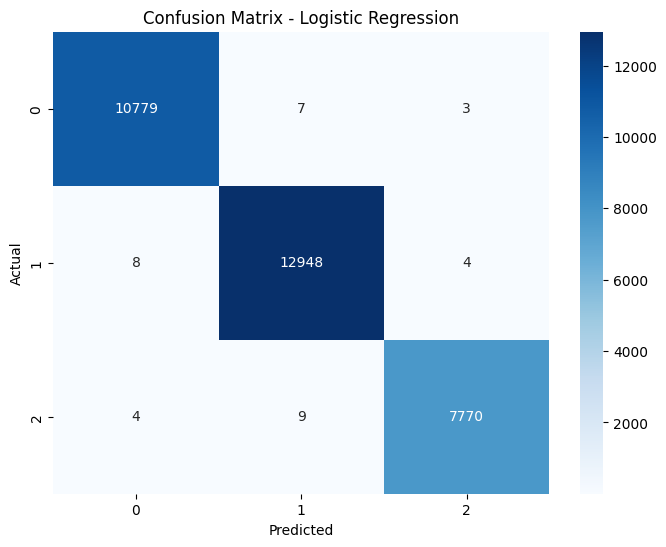

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.9838
Precision: 0.9838
Recall: 0.9838
F1 Score: 0.9838
Confusion Matrix:
[[10618   108    63]
 [  123 12762    75]
 [   64    79  7640]]


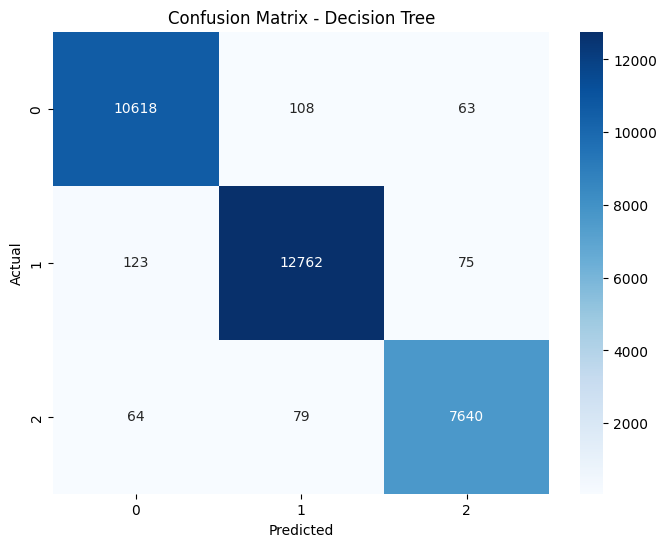

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9858
Precision: 0.9858
Recall: 0.9858
F1 Score: 0.9858
Confusion Matrix:
[[10642   118    29]
 [  110 12795    55]
 [   58    77  7648]]


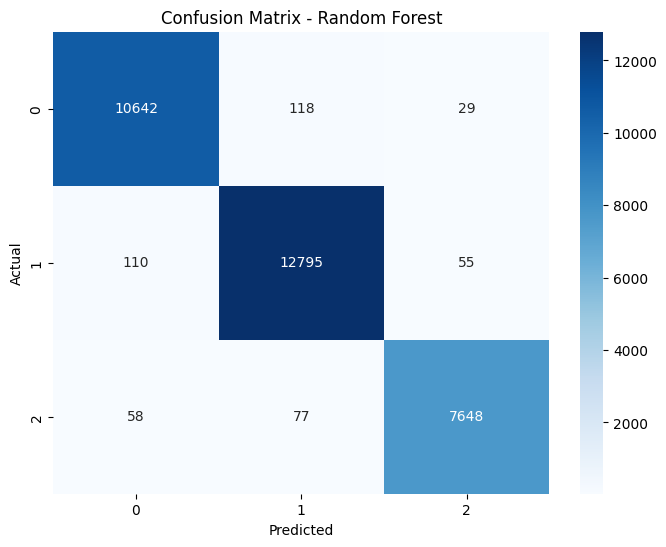

--------------------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.9327
Precision: 0.9330
Recall: 0.9327
F1 Score: 0.9326
Confusion Matrix:
[[10237   438   114]
 [  449 12235   276]
 [  318   527  6938]]


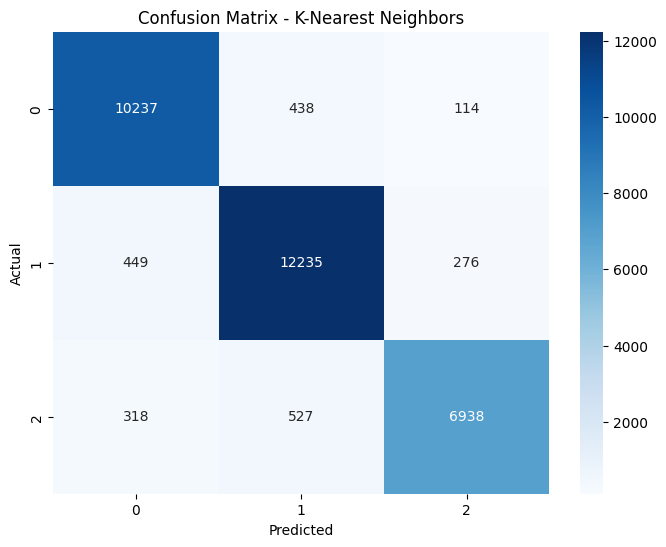

--------------------------------------------------


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Analyze each model separately
for name, model in models.items():
    # Predict on test data
    y_pred = model.predict(X_test_scaled)

    # Compute metrics
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Display results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Plot the confusion matrix
    plot_confusion_matrix(cm, name)

    print("-" * 50)


### Evaluasi dan Perbandingan Algoritma

Berdasarkan hasil evaluasi pada empat algoritma yang digunakan untuk klasifikasi dataset Spotify, berikut adalah ringkasan kinerja masing-masing model:

---

#### 1. **Logistic Regression**
- **Accuracy**: 99.89%
- **Precision**: 99.89%
- **Recall**: 99.89%
- **F1 Score**: 99.89%

**Analisis**:
Logistic Regression menunjukkan performa yang luar biasa dengan akurasi hampir sempurna. Ini menunjukkan bahwa model ini sangat baik dalam memisahkan data berdasarkan karakteristiknya. Kinerja ini ideal jika hubungan antara fitur dan target bersifat linear.

---

#### 2. **Decision Tree**
- **Accuracy**: 98.38%
- **Precision**: 98.38%
- **Recall**: 98.38%
- **F1 Score**: 98.38%

**Analisis**:
Decision Tree memberikan performa yang sangat baik, meskipun sedikit lebih rendah dibanding Logistic Regression. Ini wajar karena Decision Tree lebih rentan terhadap overfitting pada dataset tertentu, terutama tanpa parameter tuning. Namun, model ini memberikan interpretabilitas yang tinggi.

---

#### 3. **Random Forest**
- **Accuracy**: 98.58%
- **Precision**: 98.58%
- **Recall**: 98.58%
- **F1 Score**: 98.58%

**Analisis**:
Random Forest menunjukkan kinerja yang sedikit lebih baik daripada Decision Tree. Sebagai metode ensemble, Random Forest mengurangi risiko overfitting dengan menggabungkan banyak pohon keputusan, menghasilkan performa yang stabil. Ini adalah pilihan yang sangat baik untuk dataset kompleks.

---

#### 4. **K-Nearest Neighbors (KNN)**
- **Accuracy**: 93.27%
- **Precision**: 93.30%
- **Recall**: 93.27%
- **F1 Score**: 93.26%

**Analisis**:
KNN memiliki performa paling rendah di antara keempat algoritma, dengan akurasi 93.27%. Ini mungkin disebabkan oleh ketergantungannya pada jarak antar sampel, yang bisa terpengaruh oleh distribusi data atau outlier. Meskipun lebih sederhana, model ini dapat dioptimalkan dengan memilih jumlah tetangga (`n_neighbors`) yang lebih sesuai.

---

### Perbandingan dan Kesimpulan
| **Model**              | **Accuracy** | **Precision** | **Recall** | **F1 Score** |
|-------------------------|--------------|---------------|------------|--------------|
| Logistic Regression     | 99.89%       | 99.89%        | 99.89%     | 99.89%       |
| Decision Tree           | 98.38%       | 98.38%        | 98.38%     | 98.38%       |
| Random Forest           | 98.58%       | 98.58%        | 98.58%     | 98.58%       |
| K-Nearest Neighbors     | 93.27%       | 93.30%        | 93.27%     | 93.26%       |

1. **Logistic Regression** adalah algoritma terbaik dalam skenario ini, dengan performa hampir sempurna. Ini cocok untuk dataset dengan hubungan linear antara fitur dan target.
2. **Random Forest** memiliki performa yang mendekati Logistic Regression, memberikan keseimbangan yang baik antara akurasi dan generalisasi.
3. **Decision Tree** cukup kompetitif tetapi lebih rentan terhadap overfitting dibanding Random Forest.
4. **KNN** memberikan hasil yang cukup baik tetapi kinerjanya lebih rendah dibandingkan algoritma lain, terutama pada dataset besar atau kompleks.

### Rekomendasi
- Gunakan **Logistic Regression** jika interpretasi linearitas dataset dianggap relevan.
- Pilih **Random Forest** untuk memastikan generalisasi yang baik pada dataset yang lebih kompleks.
- Optimalkan **KNN** atau **Decision Tree** dengan parameter tuning jika diperlukan.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [29]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [30]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### **Identifikasi Kelemahan Model**

1. **Precision atau Recall Rendah untuk Kelas Tertentu**:
   - Dari data keseluruhan, model Logistic Regression, Decision Tree, dan Random Forest memiliki precision, recall, dan F1 score yang tinggi dan seragam di semua metrik.
   - **K-Nearest Neighbors (KNN)** memiliki kinerja paling rendah dibanding model lainnya, dengan F1 score 93.26%. Hal ini menunjukkan bahwa model ini mungkin kesulitan menangkap pola pada data, terutama jika terdapat kelas yang distribusinya tidak merata atau fitur kurang signifikan.

   **Langkah Pendalaman**:
   - Periksa **classification report** untuk setiap algoritma guna mengidentifikasi kelas yang memiliki precision atau recall rendah. Jika ada kelas tertentu dengan recall rendah, model mungkin kesulitan mendeteksi kelas tersebut (false negatives tinggi).
   - Analisis distribusi kelas dan fitur untuk mengidentifikasi ketidakseimbangan atau noise yang memengaruhi prediksi.

2. **Overfitting atau Underfitting**:
   - **Logistic Regression**: Tidak ada indikasi overfitting atau underfitting. Performanya sangat tinggi dan seimbang di training dan testing (linear relationships cocok dengan data).
   - **Decision Tree**: Kemungkinan mengalami sedikit overfitting karena model ini cenderung kompleks tanpa pruning. Meskipun akurasinya tinggi (98.38%), perbedaan kecil dengan Random Forest menunjukkan Random Forest lebih stabil.
   - **Random Forest**: Tidak menunjukkan tanda overfitting atau underfitting karena stabilitas ensemble.
   - **KNN**: Berpotensi underfitting, karena performanya jauh lebih rendah dibanding model lain. KNN bergantung pada jarak antar data yang bisa terganggu oleh distribusi yang tidak seragam atau outlier.

---

### **Rekomendasi Tindakan Lanjutan**

#### 1. **Atasi Precision atau Recall Rendah**:
   - **Class Imbalance**:
     - Terapkan teknik seperti **SMOTE** (Synthetic Minority Oversampling Technique) untuk meningkatkan jumlah data pada kelas minoritas.
     - Gunakan algoritma yang mendukung **class weighting** (misalnya `class_weight='balanced'` di Logistic Regression atau Random Forest).
   - **Feature Engineering**:
     - Analisis korelasi fitur untuk menambahkan atau mengurangi fitur berdasarkan relevansinya terhadap kelas tertentu.
     - Normalisasi atau transformasi fitur untuk algoritma yang sensitif terhadap skala (KNN, Logistic Regression).

#### 2. **Atasi Overfitting atau Underfitting**:
   - **Decision Tree**:
     - Lakukan **pruning** dengan mengatur `max_depth`, `min_samples_split`, atau `min_samples_leaf`.
   - **KNN**:
     - Lakukan tuning pada jumlah tetangga (`n_neighbors`) untuk menemukan nilai optimal.
     - Ubah metrik jarak dari Euclidean ke Manhattan atau lainnya yang sesuai.
   - **Ensemble Methods**:
     - Random Forest sudah bekerja dengan baik, tetapi jika diperlukan, coba algoritma Gradient Boosting (XGBoost, LightGBM) untuk peningkatan performa lebih lanjut.

#### 3. **Gunakan Algoritma Lain**:
   - **Support Vector Machines (SVM)**:
     - SVM cocok untuk dataset dengan margin yang sempit antara kelas. Eksplor kernel non-linear (RBF).
   - **Gradient Boosting**:
     - Algoritma seperti XGBoost atau LightGBM bisa memberikan hasil lebih baik dengan kemampuan menangani pola kompleks dan ketidakseimbangan data.
   - **Neural Networks**:
     - Jika dataset besar dan memiliki pola non-linear yang signifikan, neural networks bisa menjadi opsi, terutama dengan fitur yang relevan.

#### 4. **Kumpulkan Data Tambahan**:
   - Tambahkan data baru dari kelas yang kurang terwakili atau data dari skenario dunia nyata untuk meningkatkan generalisasi model.
   - Pastikan data tambahan memiliki distribusi yang mencerminkan populasi target.

#### 5. **Evaluasi dan Validasi**:
   - Gunakan **k-fold cross-validation** untuk mengevaluasi stabilitas model.
   - Visualisasikan **learning curve** untuk melihat bagaimana performa berubah dengan ukuran data atau parameter model.

---

### **Kesimpulan**
- **Logistic Regression** dan **Random Forest** adalah pilihan terbaik saat ini, dengan performa hampir sempurna.
- **Decision Tree** dapat ditingkatkan dengan parameter tuning untuk mencegah overfitting.
- **KNN** memiliki kelemahan yang signifikan dalam performa. Jika diperlukan, lakukan tuning atau pertimbangkan mengganti algoritma.
- Jika hasil pada kelas tertentu masih kurang memuaskan, langkah seperti penanganan class imbalance, pengayaan fitur, atau mencoba algoritma lain dapat dilakukan.